In [91]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

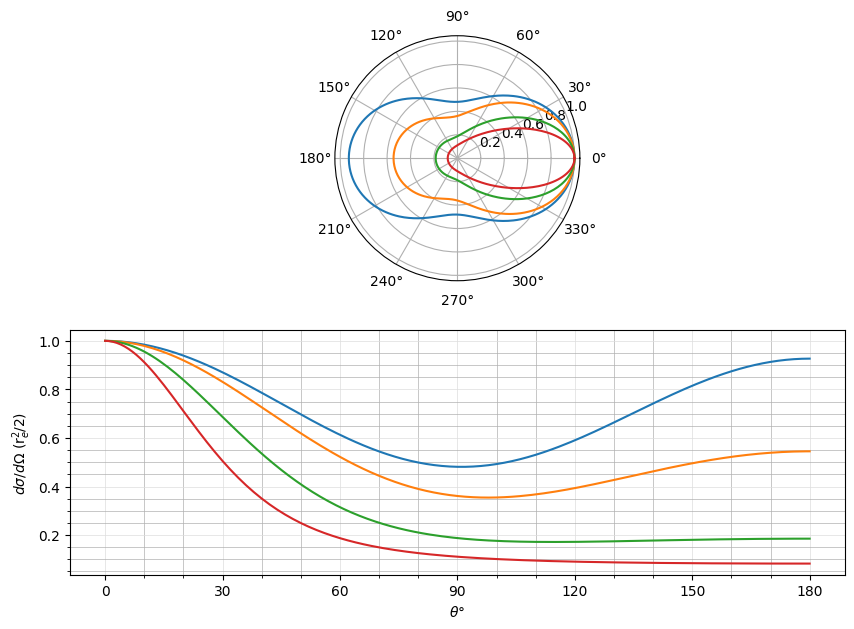

In [182]:
mc2 = 510.99895 #m*c**2 in keV
npuntos = 361

def f(E, t):
    e = E/mc2
    top = 1 + np.cos(t)**2 + (e*e*(1-np.cos(t))**2)/(1+e*(1-np.cos(t)))
    bot = (1+e*(1-np.cos(t)))**2  
    return top/(2*bot)

E = [10, 100, 511, 1333]
theta = np.linspace(0, 2*np.pi,num=npuntos)
y = np.zeros((len(E),npuntos))

for ii in range(len(E)):
    for jj in range(npuntos):
        y[ii][jj] = f(E[ii], theta[jj])
                
        
fig = plt.figure(figsize=(10,7)) 
ax0 = fig.add_subplot(211, projection='polar')
ax1 = fig.add_subplot(212)


## Gráfica polar
for ii in range (len(E)):
    ax0.plot(theta, y[ii])
    ax0.set_xticks(np.arange(0, 2*np.pi, np.pi/6))
    


## Gráfica cartesiana
for ii in range(len(E)):
    ax1.plot(np.degrees(theta)[:int(npuntos/2)+1:] ,y[ii][:int(npuntos/2)+1:], label=E[ii])
    ax1.set_xlabel(r"$\theta°$")
    ax1.set_ylabel(r"$d \sigma / d \Omega$ (r$^2_e/2$)")
    ax1.grid(which='major', color='#DDDDDD', linewidth=0.5)
    ax1.minorticks_on()
    ax1.set_xticks(np.arange(0,210,30))
    ax1.grid(True, which='both', linewidth=0.5)
    ax1.xaxis.set_minor_locator(MultipleLocator(10))